In [77]:
!git clone https://github.com/srohit0/food_mnist.git

fatal: destination path 'food_mnist' already exists and is not an empty directory.


In [6]:
import food_mnist
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = food_mnist.load_data()
labels_names = food_mnist.labels()

In [131]:
def label(x):
    return label_names[x]


this image is a : baby_back_ribs


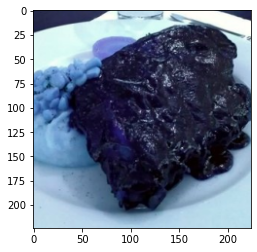

In [132]:
example = 550
g = plt.imshow(x_train[example])
print('\nthis image is a : ' + label(y_train[example]))

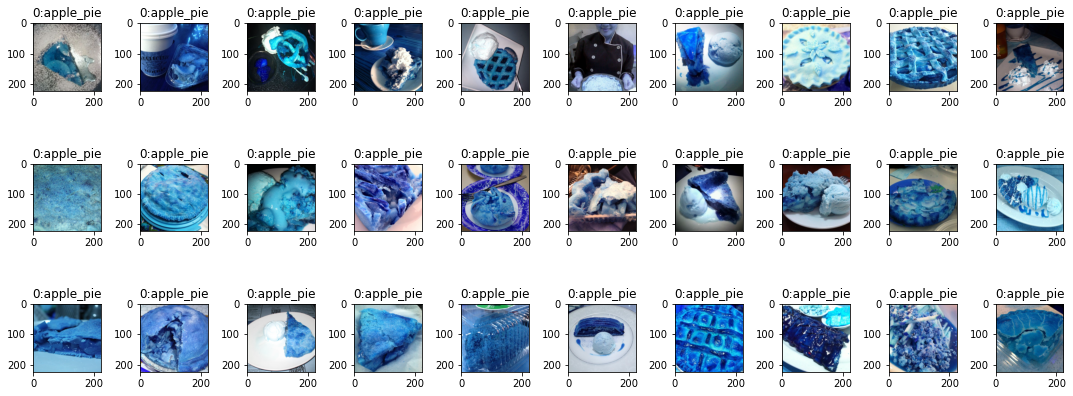

In [133]:
num_row = 3
num_col = 10
num = num_row * num_col

fig, axes = plt.subplots(num_row, num_col,
                        figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('%d:%s'%(y_train[i], label_names[y_train[i]]))
plt.tight_layout()
plt.show()

9    375
7    375
5    375
3    375
1    375
8    375
6    375
4    375
2    375
0    375
dtype: int64

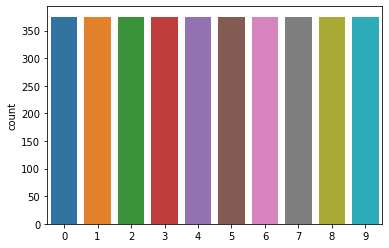

In [134]:
df = pd.Series(y_train)

g = sns.countplot(df)

df.value_counts()

In [3]:
x_train = x_train/255.
x_test = x_test/255.

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 3750
number of test examples = 1250
X_train shape: (3750, 224, 224, 3)
Y_train shape: (3750, 10)
X_test shape: (1250, 224, 224, 3)
Y_test shape: (1250, 10)


In [38]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation = tf.nn.relu), 
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [39]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
118/118 [==============================] - 70s 590ms/step - loss: 2.3151 - accuracy: 0.2125
Epoch 2/5
118/118 [==============================] - 62s 523ms/step - loss: 2.0474 - accuracy: 0.2779
Epoch 3/5
118/118 [==============================] - 68s 579ms/step - loss: 1.9751 - accuracy: 0.3171
Epoch 4/5
118/118 [==============================] - 62s 526ms/step - loss: 1.8949 - accuracy: 0.3381
Epoch 5/5
118/118 [==============================] - 61s 520ms/step - loss: 1.8321 - accuracy: 0.3664


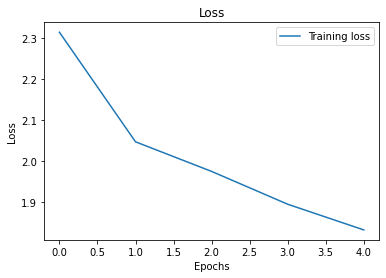

In [40]:
loss = history.history['loss']
epochs = np.arange(0,5)
plt.plot(epochs, loss, label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

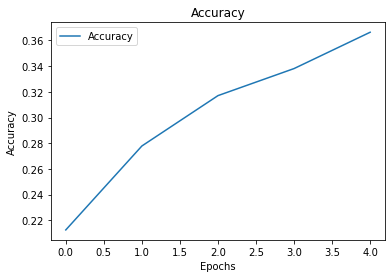

In [41]:
accuracy = history.history['accuracy']
epochs = np.arange(0,5)
plt.plot(epochs, accuracy, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
ypred = model.predict(x_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data:', total, '\nAccurately-predicted-data:', accurate, '\nWrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 1250 
Accurately-predicted-data: 319 
Wrongly-predicted-data:  931
Accuracy: 25.52 %
